In [1]:
from IPython.display import display, Math, Latex
# This is imported for proper rendering of Latex in Notebook.

# Data Pre-processing Techniques

Data pre-processing involves several transformation that are applied to the raw data to make it more amenable for learning. It is carried out before using it for model training or prediction.

There are many pre-processing techniques for ---

- Data Cleaning
    - Data Imputation
    - Feature Scaling

- Feature Transformation
    - Polynomial Features
    - Discretization
    - Handling Categorical Features
    - Custom Transformers
    - Composite Transformers
        - Apply transformation to diverse features
        - TargetTransformedRegressor

- Feature Selection
    - Filter based feature selection
    - Wrapper based feature selection

- Feature Extraction
    - PCA


The transformations are applied in a specific order and the order and order can be specified via `Pipeline`. We need to apply different transformations based on the feature type. `FeatureUnion` helps us perform the task and combine the outputs from multiple transformations into a single transformed feature matrix. We will also study how to visualize this pipeline.

### Importing basic libraries

In this notebook, we are importing libraries as needed. However, it is a good practice to have all imports in one cell - arranged in alphabetical order. This helps us weed out any duplicate imports and some such issues.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

## 1. Feature Extraction

### `DictVectorizer`

Many a times the data is present as a **list of dictionary objects**. ML algorithms expect the data in **matrix form** with shape $(n,m)$ where $n$ is the no. of samples and $m$ is the no. of features.

`DictVectorizer` converts a *list of dictionary objects* to *feature matrix*.

Let's create a sample data for demo purpose containing `age` and `height` of children.

> Each record/sample is a dictionary with $2$ keys `age` and `height`, and corresponding values.

In [3]:
data = [{'age': 4, 'height': 96.0},
        {'age': 1, 'height': 73.9},
        {'age': 3, 'height': 88.9},
        {'age': 2, 'height': 81.6},]

Let's make use of `DictVectorizer` to convert the list of dictionary objects to the feature matrix.

In [4]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [5]:
data_transformed.shape

(4, 2)

## 2. Data Imputation

- Many machine learning algorithms need full feature matrix and they may not work in the presence of missing data.
- Data imputation identifies **missing values** in each feature of the dataset and **replaces** them with an **appropriate value** based on a **fixed strategy** such as ---
    - **mean** or **median** or **mode** of that feature.
    - using **specific constant** value.


Sklearn library provides `sklearn.impute.SimpleImputer` class for this purpose.

In [6]:
from sklearn.impute import SimpleImputer

Some of its important parameters:
- *missing_values*: Could be `int`, `float`, `str`, `np.nan` or `None`. Default is `np.nan`.
- *strategy*: string, default is 'mean'. One of the following strategies can be used:
    - `mean`: missing values are replaced using the **mean** along each column
    - `median`: missing values are replaced using the **median** along each column
    - `most_frequent`: missing values are replaced using the **mode** along each column
    - `column`: missing values are replaced with value specified in the `fill_value` argument


- `add_indicator` is a boolean parametre that when set to `True` returns **missing value indicator** in `indicator_` member variable.

**Note:**
- `mean` and `median` strategies can only be used with numeric data.
- `most_frequent` and `constant` strategies can be used with strings or numeric data.

### Data imputation on real world dataset

Let's perform data imputation on real world dataset. We will be using [heart-disease dataset from uci machine learning repository](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data) for this purpose. We will load this dataset from csv file.

In [7]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalac', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None, names=cols)

In [8]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**STEP 1:** Check if the dataset contains any missing values.
- This can be checked via dataset description or by checking no. of `nan` or `np.null` in the dataframe. However, such a check can be performed only for numerical features.
- For non-numerical features, we can list their unique valeues and check if there are values like `?`.

In [9]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalac    303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Let's check if there are any missing values in numerical columns - here we have checked it for all columns in the dataframe.

In [10]:
(heart_data.isnull()).sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalac      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

There are two non-numerical features: `ca` and `thal`.
- List their unique values.

In [11]:
print("Unique values in the column ca:", heart_data['ca'].unique())
print("Unique values in the column thal:", heart_data['thal'].unique())

Unique values in the column ca: ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in the column thal: ['6.0' '3.0' '7.0' '?']


Both of them contain `?`, which are missing values. Let;s count the no. of missing values.

In [12]:
print("# missing calues in ca:", heart_data.loc[heart_data['ca']=='?', 'ca'].count())
print("# missing calues in thal:", heart_data.loc[heart_data['thal']=='?', 'thal'].count())

# missing calues in ca: 4
# missing calues in thal: 2


**STEP 2:** Replace `?` with `np.nan`.

In [13]:
heart_data.replace('?', np.nan, inplace=True)

**STEP 3:** Fill the missing values with `sklearn` missing value imputation utilities.

> Here we use `SimpleImputer` with `mean` strategy.

We will try two variations-
- `add_indicator = False`: Default choice that only imputes missing values.

In [14]:
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)

(303, 14)


- `add_indicator = True`: Adds additional column containing missing values. In our case, this adds $2$ boolean columns one for `ca` and other for `thal`. It indicates if the sample has a missing value.

In [15]:
imputer = SimpleImputer(missing_values= np.nan, strategy='mean', add_indicator=True)
imputer.fit(heart_data)
heart_data_imputed_with_indicator = imputer.transform(heart_data)
print(heart_data_imputed_with_indicator.shape)

(303, 16)


## 3. Feature Scaling

Feature scaling **transforms feature values** such that all the features are on the **same scale**.

When we use feature matrix with all features on the same scale, it provides us certain advantages as listed below:
- **Enables faster convergence** in iterative optimizationn algorithms like gradient descent and its variants.
- The performance of ML algorithms such as SVM, K-NN and K-means etc. that compute euclidean distance amongst its input samples gets impacted if the features are not scaled.

Tree based ML algorithms are not affected by feature-scaling. In other words, feature scaling is not required for tree based ML algorithms.

Feature scaling can be performed with the following methods:
- Standardization
- Normalization
- MaxAbsScaler

Let's demonstate feature scaling on a real world dataset. For this purpose we will be using [ablone dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data). We will use different scaling utilities in `sklearn` library.

In [16]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names=cols)

In [17]:
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**STEP 1:** Examine the dataset

Feature scaling is performed only on numerical attributes. Let's check which are numerical attributes in this dataset. We cna get that via `info()` method.

In [18]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**STEP 1a**[OPTIONAL]: Convert non-numerical attributes to numerical ones.

> In this dataset, `Sex` is a non-numeric column in this dataset. Let's examine it and see if we can convert it to numeric representation.

In [19]:
abalone_data['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [20]:
# Assign numericla values to sex.
abalone_data = abalone_data.replace({"Sex": {'M':1, 'F':2, 'I':3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


**STEP 2:** Separate labels from features.

In [21]:
y = abalone_data.pop('Rings')
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


**STEP 3:** Examine feature scales

**Statistical method**

Check the scales of different features with `describe()` method of DataFrame.

In [22]:
abalone_data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,3.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


**Visualization of feature distribution**

Visualize feature distributions.
- Histogram
- Kernel density estimation (KDE) plot
- Box plot
- Violin

1. Histogram

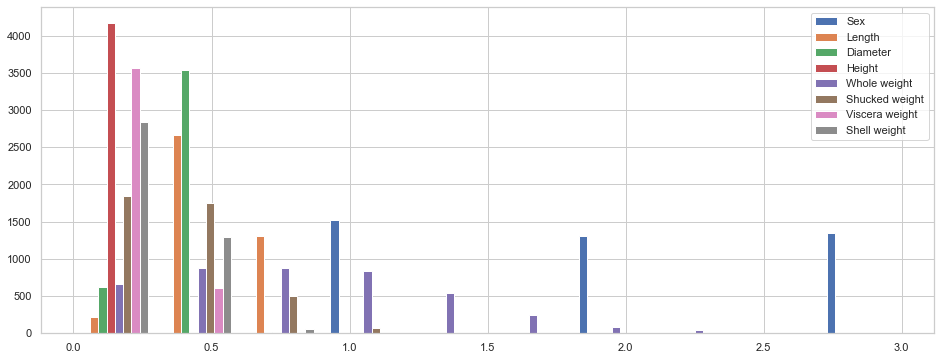

In [23]:
fig = plt.figure(figsize=(16,6))
plt.hist(abalone_data, label=abalone_data.columns)
plt.legend()
plt.show()

2. KDE

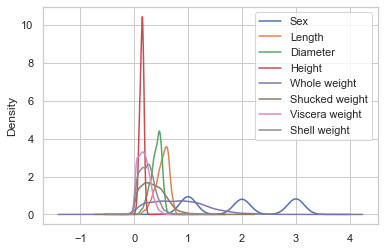

In [24]:
ax = abalone_data.plot.kde()

3. Boxplots

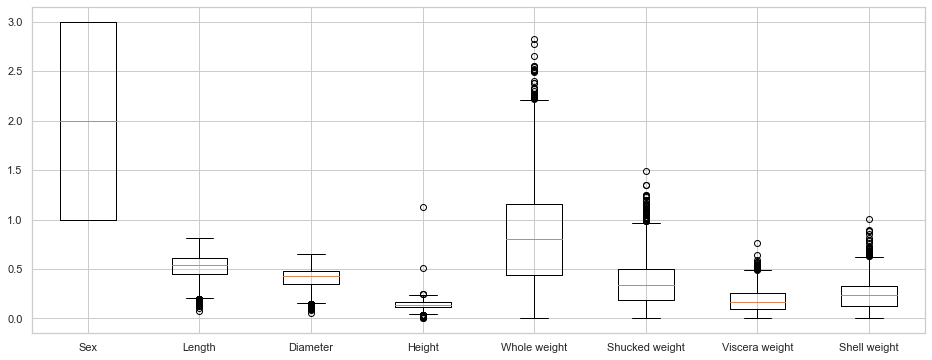

In [25]:
fig = plt.figure(figsize=(16,6))
plt.boxplot(abalone_data, labels=abalone_data.columns)
plt.show()

4. Violinplots

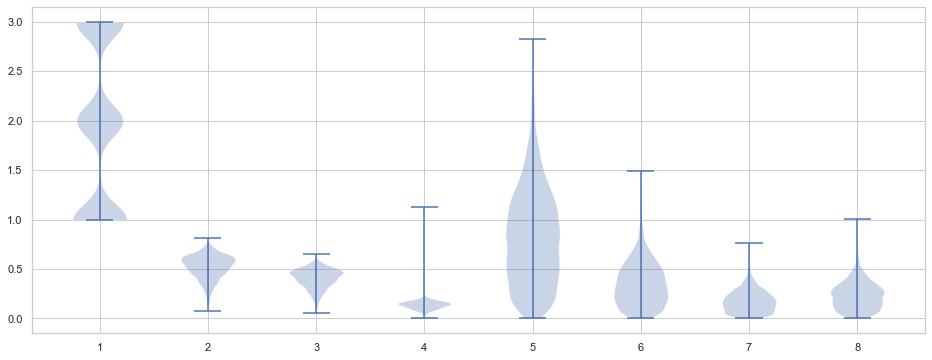

In [26]:
fig = plt.figure(figsize=(16,6))
plt.violinplot(abalone_data)
plt.show()

We can conclude after after looking at these plots are that the features are indeed of different scales.

**STEP 4:** Scaling

### 1. Normalization

The features are normalized such that their range lies between $[0,1]$ or $[-1,-1]$. There are $2$ ways to achieve this.
- `MaxAbsoluteScaler` transforms features in range $[-1,1]$
- `MinMaxScaler` transforms features in range $[0,1]$

`MaxAbsoluteScaler`

It transforms the original feature vector $x$ into new feature vector $x'$ so that all values fall within the range $[-1,1]$ ---
$$x' = \frac{x}{\text{MaxAbsoluteValue}}$$

where $\text{MaxAbsoluteValue} = max(x.max, |x.min|)$

In [27]:
x = np.array([4,2,5,-2,100]).reshape(-1,1)
print(x)

[[  4]
 [  2]
 [  5]
 [ -2]
 [100]]


In [28]:
from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
print(x_new)

[[ 0.04]
 [ 0.02]
 [ 0.05]
 [-0.02]
 [ 1.  ]]


`MinMaxScaler`

It transforms the original feature vector $x$ into new feature vector $x'$ so that all values fall within the range $[0,1]$ ---
$$x' = \frac{x - x.min}{x.max - x.min}$$

In [29]:
from sklearn.preprocessing import MinMaxScaler
X = abalone_data
mms = MinMaxScaler()
X_normalized = mms.fit_transform(X)
X_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

The means and SDs of different features are now comparable. We can confirm this again using **Statistics** and **Visualization** methods.

In [30]:
print(X_normalized.mean(axis=0))
print(X_normalized.std(axis=0))

[0.47773522 0.60674608 0.59307774 0.12346584 0.29280756 0.24100033
 0.23712127 0.2365031 ]
[0.4138578  0.16226829 0.16676972 0.03701066 0.17366046 0.14925109
 0.14430695 0.13870055]


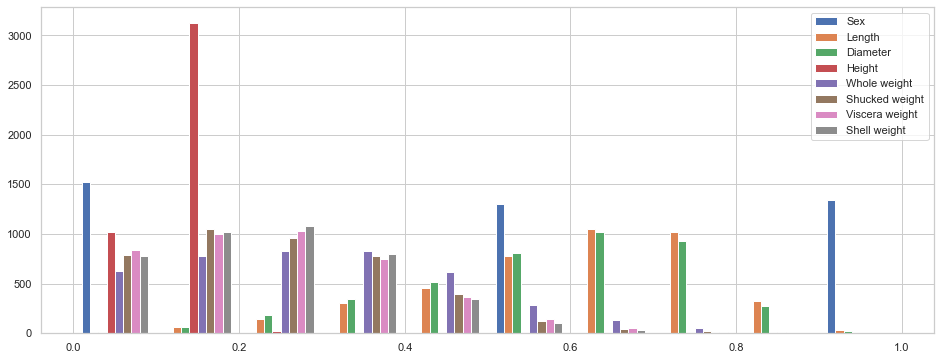

In [31]:
fig = plt.figure(figsize=(16,6))
plt.hist(X_normalized, label=abalone_data.columns)
plt.legend()
plt.show()

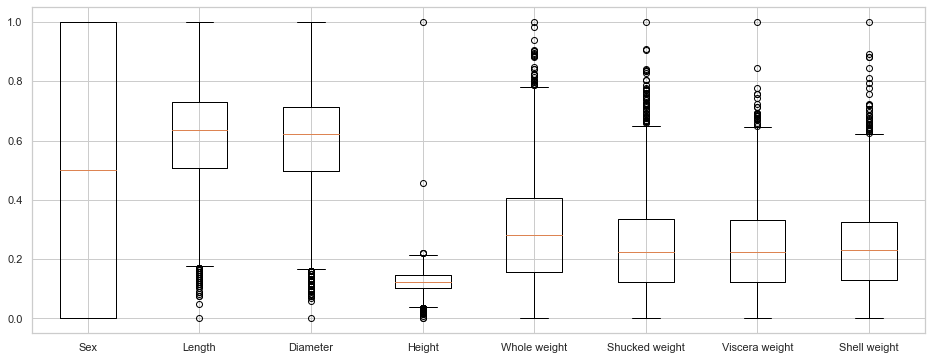

In [32]:
fig = plt.figure(figsize=(16,6))
plt.boxplot(X_normalized, labels=abalone_data.columns)
plt.show()

### 2. Standardization

Standardization is another feature scaling technique that results into (close to) zero mean and unit standard deviation of a feature's values.

Formula for standardization:
$$x' = \frac{x - \mu}{\sigma}$$

Here, $\mu$ and $\sigma$ respectively are the mean and standard deviation of the feature values.

Standardization can be achieved by the `StandardScaler` from `sklearn` library.

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_standardized = ss.fit_transform(X)
X_standardized[:5]

array([[-1.15434629, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
        -0.4634999 , -0.35668983, -0.20713907],
       [-1.15434629, -0.69947638, -0.43214879, -0.34709919, -0.63781934,
        -0.64823753, -0.60759966, -0.60229374],
       [ 1.26194258, -1.61554351, -1.54070702, -1.42308663, -1.27208566,
        -1.2159678 , -1.28733718, -1.32075677]])

In [34]:
print(X_standardized.mean(axis=0))
print(X_standardized.std(axis=0))

[-1.19075871e-17 -5.83471770e-16 -3.02792930e-16  3.91249292e-16
  9.18585294e-17 -1.02065033e-17  2.70472337e-16  2.97689679e-16]
[1. 1. 1. 1. 1. 1. 1. 1.]


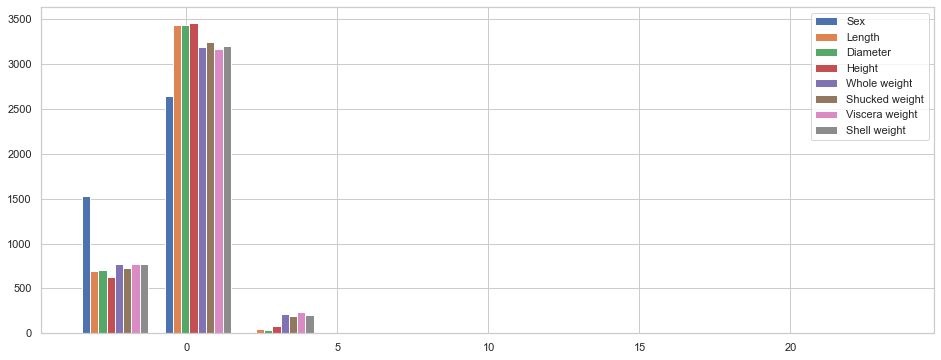

In [35]:
fig = plt.figure(figsize=(16,6))
plt.hist(X_standardized, label=abalone_data.columns)
plt.legend()
plt.show()

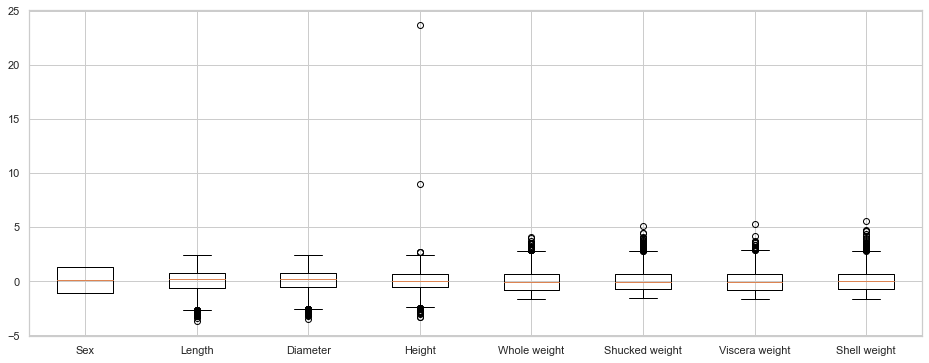

In [36]:
fig = plt.figure(figsize=(16,6))
plt.boxplot(X_standardized, labels=abalone_data.columns)
plt.show()

## 4. Adding Dummy Features

Augments datasets with a column vector, each value in the column vector is 1. This is useful for adding a parameter for the bias term in the model.

In [38]:
x = np.array(
    [[7,1],
     [1,8],
     [2,0],
     [9,6]]
)

from sklearn.preprocessing import add_dummy_feature
x_new = add_dummy_feature(x)
print(x_new)

[[1. 7. 1.]
 [1. 1. 8.]
 [1. 2. 0.]
 [1. 9. 6.]]


## 5. Custom Transformers

This enables conversion of an existing Python function into a transformer to assist in data cleaning or processing.

This is useful when:
1. The dataset consists of *heterogenous data types* (e.g. raster images and text captions).
2. The dataset is stored in a `pandas.DataFrame` and different columns requires *different processing pipelines*.
3. We need stateless transformations such as taking the log of frequencies, custom scaling, etc.

In [39]:
from sklearn.preprocessing import FunctionTransformer

You can implement a transformer from an arbitrary function with `FunctionTransformer`.
- For example, let's build a transformer that applies a log transformation to features:

For this demonstration, we will be using a [wine quality dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) from UCI machine learning repository.

In [40]:
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

In [41]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [43]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Let's use `np.log1p` which returns natural logarithm of $(1 + \text{the feature value})$

In [45]:
transformer = FunctionTransformer(np.log1p, validate=True)
wine_data_transformed = transformer.transform(np.array(wine_data))
wine_data_transformed[:5]

array([[2.12823171, 0.53062825, 0.        , 1.06471074, 0.07325046,
        2.48490665, 3.55534806, 0.69204658, 1.50629715, 0.44468582,
        2.34180581, 1.79175947],
       [2.17475172, 0.63127178, 0.        , 1.28093385, 0.09349034,
        3.25809654, 4.21950771, 0.6915459 , 1.43508453, 0.51879379,
        2.37954613, 1.79175947],
       [2.17475172, 0.56531381, 0.03922071, 1.19392247, 0.08801088,
        2.77258872, 4.00733319, 0.69164605, 1.44926916, 0.50077529,
        2.37954613, 1.79175947],
       [2.50143595, 0.24686008, 0.44468582, 1.06471074, 0.07232066,
        2.89037176, 4.11087386, 0.69214668, 1.42551507, 0.45742485,
        2.37954613, 1.94591015],
       [2.12823171, 0.53062825, 0.        , 1.06471074, 0.07325046,
        2.48490665, 3.55534806, 0.69204658, 1.50629715, 0.44468582,
        2.34180581, 1.79175947]])

In [46]:
pd.DataFrame(wine_data_transformed, columns=wine_data.columns).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,2.215842,0.417173,0.228147,1.218131,0.083038,2.639013,3.634750,0.691519,1.460557,0.501073,2.431458,1.885054
std,0.178100,0.114926,0.152423,0.269969,0.038991,0.623790,0.682575,0.000945,0.035760,0.093731,0.090434,0.122749
min,1.722767,0.113329,0.000000,0.641854,0.011929,0.693147,1.945910,0.688170,1.319086,0.285179,2.240710,1.386294
25%,2.091864,0.329304,0.086178,1.064711,0.067659,2.079442,3.135494,0.690945,1.437463,0.438255,2.351375,1.791759
50%,2.186051,0.418710,0.231112,1.163151,0.076035,2.708050,3.663562,0.691521,1.460938,0.482426,2.415914,1.945910
75%,2.322388,0.494696,0.350657,1.280934,0.086178,3.091042,4.143135,0.692064,1.481605,0.548121,2.493205,1.945910
max,2.827314,0.947789,0.693147,2.803360,0.476855,4.290459,5.669881,0.694990,1.611436,1.098612,2.766319,2.197225


## 6. Polynomial Features

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
- For example, if an input sample is $2$-dimensional and of the form $[a,b]$, the degree-$2$ polynomial features are $[1, a, b, a^2, ab, b^2]$.

`sklearn.preprocessing.PolynomialFeatures` enables us to perform transformation of desired degree. Let's demonstrate it with the `wine quality` dataset again.

In [47]:
from sklearn.preprocessing import PolynomialFeatures

wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
wine_data_copy = wine_data.copy()

wine_data = wine_data.drop(['quality'], axis=1)
print('Number of features before transformation: ', wine_data.shape)

# Let us fit a polynomial of degree 2 to wine_data
poly = PolynomialFeatures(degree=2)
poly_wine_data = poly.fit_transform(wine_data)
print('Number of features after transformation: ', poly_wine_data.shape)

Number of features before transformation:  (1599, 11)
Number of features after transformation:  (1599, 78)


Note that after transformation, we have 78 features. Let's list out these features:

In [58]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x9^2',
 'x9 x10',
 'x10^2']

Observe that -
- Some features have `^2` suffix - these are degree $2$ features of the input features. For example - `x0^2` is the square of `x0` (`'fixed acidity'`) feature.
- Some features are combination of names of the original feature names. For example `x0 x1` is a combination of $2$ features `'fixel_acidity'` and `'volatile acidity'`.

## 7. Discretization

**Discretization** (otherwise known as **quantization** or **binning**) provides a way to partition continuous features into discrete values.
- Certain dataseets with continuous features may benefit from discretization, because discretization can transform the dataset of continuous attributes to one with only nominal attributes.
- One-hot encoded discretized features can make a model more expressive, while maintaining interpretability.
- For instance, pre-processing with a discretizer can introduce non-linearity into linear models.

In [59]:
# KBinsDiscretizer discretizes features into 'k' bins
from sklearn.preprocessing import KBinsDiscretizer

Let's demonstrate `KBinsDiscretizer` using `wine quality` dataset.

In [61]:
wine_data = wine_data_copy

# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X = np.array(wine_data['chlorides']).reshape(-1,1)
X_binned = enc.fit_transform(X)
X_binned

<1599x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

In [62]:
# Since output is sparse, use toarray() to expand it.
X_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

## 8. Handling Categorical Features

Categorical features are those that contain categories or groups such as education level, state etc as their data. These are non-numerical features and need to be converted into appropriate form before they are feeding them for training a ML model.

We need to convert the categorical features into numeric features.
1. Ordinal encoding
2. One-hot encoding
3. Label encoder
4. Multi Label Binarizer
5. Using Dummy variables

### Ordinal Encoding

One intuitive way of handling categorical features could be by assigning them a numerical value. As an example, take state as a feature with `'Punjab'`, `'Rajasthan'` and `'Haryana'` as the possible values. We might consider assigning numbers to these values as follows:
`{'Punjab':1, 'Rajasthan':2, 'Haryana':3}`.

However, this approach assigns some ordering to the labels, i.e. states, thus representing `'Haryana` as thrice `'Punjab'`, where as these relationships do not exist in the data, thus providing wrong information to the ML model.

One of the most common approaches to handle this is: *One-hot encoding*.

### One-hot Encoding

This approach consists of creating an additional feature for each label present in the categorical feature(i.e. the number of different states here) and putting a $1$ or $0$ for these features depending on the categorical feature's value. That is ---
`{
    'Punjab':       [1,0,0],
    'Rajasthan':    [0,1,0],
    'Haryana':      [0,0,1]
}`

It may be implemented using the `OneHotEncoder` class from `sklearn.preprocesing` module. Let's demonstrate this concept with `Iris` dataset.

In [63]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [64]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The `label` is a categorical attribute.

In [66]:
iris_data['label'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are $3$ class labels. Let's convert them into one hot vectors.

In [69]:
ohe = OneHotEncoder(categories='auto')
print('Shape of y before encoding: ', iris_data['label'].shape)

'''
Passing 1d arrays as data to ohe is deprecated in version,
hence reshape to (-1,1) to have 2 dimensions.
Input of ohe.fit_transform must not be a 1-rank array
'''

iris_labels = ohe.fit_transform(iris_data['label'].values.reshape(-1,1))

# y.reshape(-1,1) is a 150x1 sparse matric of type '<class 'numpy.float64'>' with 150 stored elements in Coordinate format.
# y is a 150*3 sparse matrix of type '<class 'numpy.float64'>' with 150 stored elements in compresse sparse row format.

print('Shape of y after encoding: ', iris_labels.shape)

# since output is sparse, use toarray() to expand it.
print('First 5 labels in onehot format: ')
print(iris_labels.toarray()[:5])

Shape of y before encoding:  (150,)
Shape of y after encoding:  (150, 3)
First 5 labels in onehot format: 
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Let's observe the difference between one hot encoding and ordinal encoding.

In [70]:
enc = OrdinalEncoder()

# get the class column into a new variable
iris_labels = np.array(iris_data['label'])

iris_labels_transformed = enc.fit_transform(iris_labels.reshape(-1,1))
print('Unique labels', np.unique(iris_labels_transformed))

print('\nFirst 5 labels: ')
print(iris_labels_transformed[:5])

Unique labels [0. 1. 2.]

First 5 labels: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### Label Encoder



Another option is to use `LabelEncoder` for transforming categorical features into integer codes.

In [71]:
from sklearn.preprocessing import LabelEncoder

In [73]:
le = LabelEncoder()

# get the class column into a new variable
iris_labels = np.array(iris_data['label'])

# encode the class names to integers
label_integer = le.fit_transform(iris_labels)
label_integer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Multilabel Binarizer

Encodes categorical features with values between $0$ and $k-1$, where $k$ is the number of classes.

In [74]:
movie_genres = [
    {'action','comedy'},
    {'comedy'},
    {'action','thriller'},
    {'science-fiction','action','thriller'}
]

In [75]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(movie_genres)

# This is sort of like one-hot encoder for multiple labels.

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

Here, the first column indicates the presence or absence of `'action'`, the second column for `'comedy'`, the third for `'science-fiction'` and fourth for `'thriller'`.

### Using Dummy variables

In [77]:
# use get_dummies to create a one-hot encoding for each unique catgorical value in the 'class' column
# convert categorical class variable to one-hot encoding:

iris_data_onehot = pd.get_dummies(iris_data, columns=['label'], prefix=['one_hot'])
iris_data_onehot

,sepal length,sepal width,petal length,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## 9. Composite Transformers

### Column Transformer

It applies a set of transformations to columns of an array or `pandas.DataFrame`, concatenates the trnsformed outputs from sifferent transformers into a single matrix.
- It is useful for transforming heterogenous data by applying different transformers to separate subset of features.
- It combines different feature selection mechanisms and transformation into a single transformer object.

In [78]:
x = [
    [20.0, 'male',],
    [11.2, 'female',],
    [25.6, 'female',],
    [13.0, 'male',],
    [18.6, 'male',],
    [16.4, 'female',],
]
x = np.array(x)

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder

ct = ColumnTransformer([
    ('mascaler', MaxAbsScaler(), [0]),
    ('pass', 'passthrough', [0]), # Copies the column 0, without doing anything
    ('ohencoder', OneHotEncoder(), [1])
])

ct.fit_transform(x)

array([['0.78125', '20.0', '0.0', '1.0'],
       ['0.43749999999999994', '11.2', '1.0', '0.0'],
       ['1.0', '25.6', '1.0', '0.0'],
       ['0.5078125', '13.0', '0.0', '1.0'],
       ['0.7265625', '18.6', '0.0', '1.0'],
       ['0.6406249999999999', '16.4', '1.0', '0.0']], dtype='<U32')

### Transformed Target Regressosr

Transforms the target variable `y` before fitting a regression model.
- The predicted values are mapped back to the original space via an inverse transform.
- It takes *regressor* and transformer to be applied to the target variable as arguments.

In [1]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

X,y = fetch_california_housing(return_X_y=True)
X,y = X[:2000,:], y[:2000] # select a subset of data

transformer = MaxAbsScaler()

# 2 regressors:
# - one based on original label.
regressor = LinearRegression()

# - second based on the transformed labels.
regr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)

# Training on the transformed data
regr.fit(X_train,y_train)
print('R2 score of transformed label regression: {0:.2f}'.format(
    regr.score(X_test,y_test)
))

# Training on the raw data
raw_target_regr = regressor.fit(X_train,y_train)
print('R2 score of raw label regression: {0:.2f}'.format(
    raw_target_regr.score(X_test,y_test)
))

R2 score of transformed label regression: 0.59
R2 score of raw label regression: 0.59


## 10. Feature Selection

`sklearn.feature_selection` module has useful APIs to select features/reduce dimensionality, either to improve estimators' accuracy scores or boost their performance on very high-dimensional datasets.

## 10.1 Filter based methods

### Variance Threshold

This transformer helps to keep only high variance features by providing a certain threshold.

> Features with variance greater than or equal to threshold value are kept and the rest are removied.
> By default it removes any features with same value i.e. $0$ variance.

In [84]:
data = [
    {'age':4, 'height':96.0},
    {'age':1, 'height':73.9},
    {'age':3, 'height':88.9},
    {'age':2, 'height':81.6},
]

dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)

np.var(data_transformed, axis = 0)

array([ 1.25 , 67.735])

In [85]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=9)
# Only those features with variance > 9 will be selected. 
# In this particular example Column 0 will be dropped, because it only has a variance of 1.25.
data_new = vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

### Select K Best

It selects `k` highest scoring features based on a function and removes the rest of the features.

Let's take an example of the `California Housing` dataset.

In [86]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# download the data
X_california, y_california = fetch_california_housing(return_X_y=True)

# select a subset of data
X,y = X_california[:2000,:],y_california[:2000]

print(f'Shape of feature matrix before feature selection:{X.shape}')

Shape of feature matrix before feature selection:(2000, 8)


Let's select `3` most important features, since it is a regression problem, we can either use `mutual_info_regression` or `f_regression` scoring functions only.

In [87]:
skb = SelectKBest(mutual_info_regression, k=3)
X_new = skb.fit_transform(X,y)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


As we can see from the above output, the transformed data now only has the top `3` features.

### Select Percentile

This is very similar to `SelectKBest` from previous section, the only difference being it selects the top `percentile` of all features and drops the rest of the features.

Similar to `SelectKBest`, it also uses a scoring function to decide the importance of features.

Let's use the `California Housing` dataset for this API.

In [99]:
from sklearn.feature_selection import SelectPercentile

sp = SelectPercentile(mutual_info_regression, percentile=30)
X_new = sp.fit_transform(X,y)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


As we can see from the above output, the transformed data now only has the top `30` percentile of features, i.e. only $3$ out of $8$ features.

## 10.2 Wrapper based methods

### RFE (Recursive Feature Elimination)

- **STEP 1:** Fits a model and 
- **STEP 2:** Ranks the features, afterwards it removes one or more features (depending upon the `step` parameter) - it removes those many features at a time.

These $2$ steps are repeated untill the desired no. of features are selected.

In [103]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# select a subset of data from the California dataset
X,y = X_california[:2000,:],y_california[:2000]

estimator = LinearRegression()
selector = RFE(estimator=estimator, n_features_to_select=3, step=1)
selector = selector.fit(X,y)
X_new = selector.transform(X)

# If we are not interested in knowing the rank we can just do the following -
'''
estimator = LinearRegression()
selector = RFE(estimator=estimator, n_features_to_select=3, step=1)
X_new = selector.fit_transform(X,y)
'''

# support_ attribute is a boolean array marking which features are selected
print(selector.support_)

# ranking of each feature ---
# if it's rank is '1', then it is selected
# features with rank '2' or more are not selected
print(f'Rank of each feature is : {selector.ranking_}')
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

[ True False False False False False  True  True]
Rank of each feature is : [1 5 4 3 6 2 1 1]
Shape of feature matrix after feature selection:(2000, 3)


### RFE-CV (Recursive Feature Elimination - Cross Validation)

This is same as `RFE`, but it just adds another layer of cross validation to `RFE`.

### Select From Model

Selects desired no. of important features (as specified with `max_features` parameter) above certain threshold of feature importance as obtained from the trained estimator.
- The feature importance is obtained via `coef_`, `feature_importances_` or an `importance_getter` callable from the trained estimator.
- The feature importance threshold can be specified either numerically or through string argument based on built-in heuristics such as `mean`, `median` and float multiple of these like `0.1*mean`.

The following example uses the `California housing` dataset. Using `SelectFromModel` the top $3$ features are selected.

In [112]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

# select a subset of data from the California dataset
X,y = X_california[:2000,:],y_california[:2000]

estimator = LinearRegression()
estimator.fit(X, y)

print(f'Coefficients of features: {estimator.coef_}')
print(f'Indices of top {3} features: {np.argsort(estimator.coef_)[-3:]}')
t = np.argsort(np.abs(estimator.coef_))[-3:]
model = SelectFromModel(estimator=estimator, max_features=3, prefit=True)
X_new = model.transform(X)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Coefficients of features: [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
Indices of top 3 features: [1 2 0]
Shape of feature matrix after feature selection:(2000, 3)


### Sequential Featue Selection

It performs feature selection by selecting or deselecting features one by one in a greedy manner. These uses one of the $2$ approaches ---
- Forward Selection
- Backward Selection

The `direction` parameter controls whether *forward* or *backward* SFS is used.

- In general, forward and backward selection *do not* yield equivalent results.
- Select the direction that is efficient for the required number of selected features.


In [115]:
from sklearn.feature_selection import SequentialFeatureSelector

# select a subset of data from the California dataset
X,y = X_california[:2000,:],y_california[:2000]

estimator = LinearRegression()

1. Forward Selection

Starting with a zero feature, it finds one feature that obtains the best cross validation score for an estimator when trained on that feature.

Repeats the process by adding a new feature to the set of selected features.

> Stops when reach the desired number of features.

In [116]:
%%time

# By default direction='forward'
sfs = SequentialFeatureSelector(estimator=estimator, n_features_to_select=3)
X_new = sfs.fit_transform(X,y)
print(sfs.get_support())
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

[ True False False False False  True  True False]
Shape of feature matrix after feature selection:(2000, 3)
CPU times: user 637 ms, sys: 192 ms, total: 829 ms
Wall time: 123 ms


2. Backward Selection

Starting with all features and removes least important features one by one following the idea of forward selection.

> Stops when reach the desired number of features.

In [117]:
%%time

sfs = SequentialFeatureSelector(estimator=estimator, n_features_to_select=3, direction='backward')
X_new = sfs.fit_transform(X,y)
print(sfs.get_support())
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

[ True False False False False  True  True False]
Shape of feature matrix after feature selection:(2000, 3)
CPU times: user 1.09 s, sys: 301 ms, total: 1.39 s
Wall time: 199 ms


A couple of observations:
- Both `forward` and `backward` selection methods select the same features.
- The `backward` selection method takes longer than `forward` selection method, because we just had to select $3$ features in `forward` instead of removing $7$ in `backward`.

So, depending upon the no. of features, SFS can accomplish feature selection in different periods for backward and forward and we need to select the direction carefully.

## 11. PCA

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that capture maximum amount of the variance.

It helps in reducing dimensions of a dataset, thus computational cost of next steps e.g. training a model, cross validation etc.

Let's generate some artificial data to better under PCA:

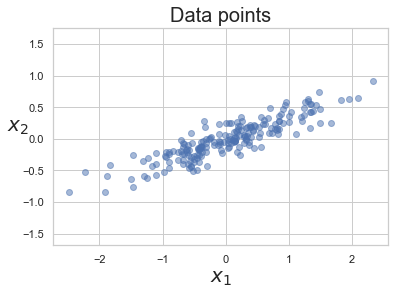

In [137]:
#@title [Generate synthetic dataset]
rand = np.random.RandomState(1)
X = np.dot(rand.rand(2, 2), rand.randn(2, 200)).T

plt.figure()
plt.title('Data points', size = 20)

# set x and y labels
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation = 0)

# plot the data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.axis('equal');

Let's fit a `PCA` transformer on this data and compute its $2$ principal components:

In [138]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Let's print the principal azes, they are two $2D$ vectors for this example. The PCA object returns them in the form of a matrix, where **each column represents a principal component:**

In [139]:
print(f'The {pca.n_components_} principal axes are:\n', pca.components_)

The 2 principal axes are:
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


Let's also look at the explained variance corresponding to each principal axes.

In [140]:
print('Explained variance by each component: ', pca.explained_variance_)

Explained variance by each component:  [0.7625315 0.0184779]


In [141]:
print('Mean across x1 and x2 dimensions is: ', pca.mean_)

Mean across x1 and x2 dimensions is:  [ 0.03351168 -0.00408072]


To better understand PCA, let's visualize these principal axes.
- There are $2$ principal axes $C_1$ and $C_2$. They are orthogonal to each other. An additional vector $C_3$ is also mentioned for comparison.
- The lengths of $C_1$ and $C_2$ are takenn as the square root of respective explained variance. The length of the vector basically represents how important that vector is.

Let's the principal components.

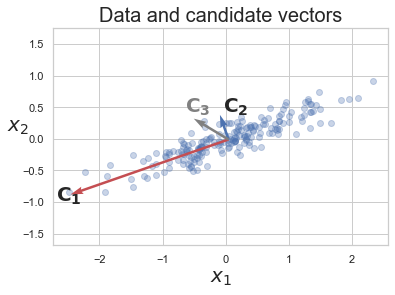

In [142]:
#@title [Visualize principal components]
# set x and y labels
plt.figure()
plt.title('Data and candidate vectors', size = 20)
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation = 0)

# plot data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)

for length, principal_axis, axis_name, i_color in zip(pca.explained_variance_, 
                                    pca.components_, 
                                    ['$\mathbf{C_1}$','$\mathbf{C_2}$'],
                                    ['r','b']):
    v = principal_axis * np.sqrt(length)
    v0, v1 = pca.mean_, pca.mean_ + v

    # draw principal axis
    plt.quiver(*v0,*(v1-v0),scale=0.33, scale_units='xy', color=i_color)

    # label the  principal axis
    plt.text(*(3.4*v1), axis_name, size = 20)

# draw 3rd component
lengths = np.eye(2)
np.fill_diagonal(lengths, np.sqrt(pca.explained_variance_))

c3 = pca.mean_+[-0.5,0.3]

plt.quiver(*pca.mean_,
           *(1.1*(c3-pca.mean_)),
           scale=1,
           scale_units='xy',
           color='grey')

# label the  principal axis
plt.text(*(1.4*c3), 
         '$\mathbf{C_3}$', 
         size = 20,
         color='grey')

plt.axis('equal')
plt.show()

In [143]:
# draw projections of data points on different vectors
projections = X @ pca.components_
print(projections.shape)

arbitrary_projection = X@c3
print(arbitrary_projection.shape)

(200, 2)
(200,)


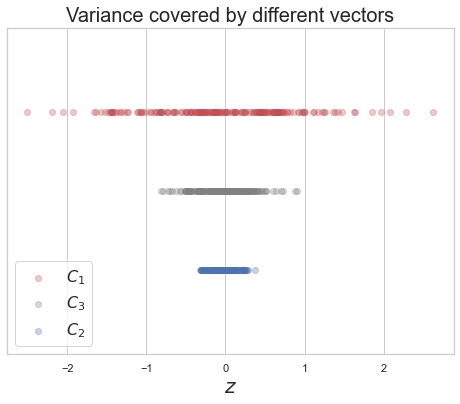

In [144]:
plt.figure(figsize=(8,6))
plt.scatter(projections[:,0], 1+np.zeros((200,1)), alpha=0.3, color='r')
plt.scatter(arbitrary_projection, np.zeros((200,)), alpha=0.3, color='grey')
plt.scatter(projections[:,1], -1+np.zeros((200,1)), alpha=0.3, color='b')
plt.legend(['$C_1$', '$C_3$', '$C_2$'], prop={'size':16})
plt.title("Variance covered by different vectors", size = 20)
plt.ylim([-1.5,1.5])
plt.axis('equal')
plt.grid(True)
plt.yticks([],[])
plt.xlabel('$z$', size = 20)
plt.show()

### Reducing Dimensions

We can use PCA to reduce number of dimensions of a dataset. The components that are least important i.e. their explained variance is low, are removied and only those components that capture high (i.e. desired) amount of variance are kept.

> Note: Only the components orthogonal to the kept components are kept, to capture the maximum variance.

Let's reduce the dimension of our data from $2$ to $1$. You can observe the transformed data only $1$ feature.

In [145]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("Original Shape: ", X.shape)
print("PCA transformed Shape: ", X_pca.shape)

Original Shape:  (200, 2)
PCA transformed Shape:  (200, 1)


To better understand what happened to our data, let's visualize our original data and the reduced data.

To fo this, we will need to bring the transformed data into the space of the original data, which can be accomplished by `inverse_transform` method of the `PCA` object.

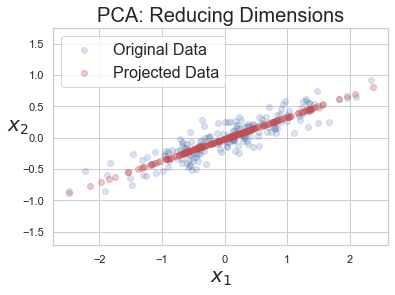

In [146]:
#@title [Visualize data in PC space]
# inverse transform the reduced data
X_new = pca.inverse_transform(X_pca)

plt.figure()
plt.title('PCA: Reducing Dimensions', size = 20)
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation = 0)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.3, c='r')
plt.legend(['Original Data', 'Projected Data'], prop={'size' : 16})
plt.axis('equal')
plt.show()

From the above chart it is clear that the new/transformed data points are now projected on $C_1$ vector.

These new data points seems to be reasonably capturing the old data points.

## 12. Chaining Transformers

The preprocessing transformations are applied one after another on the input feature matrix.

> It is very important to apply exactly the same transformations on training, evaluation and test set in the same order.

Failing to do so would lead to incorrect predictions from the model due to distribution shift ans hence incorrect performance evaluation.

The `sklearn.pipeline` module provides utilities to build a composite estimator, as a chain of transformers and estimators.

### Pipeline

Sequentially apply a list of transformers and estimators.
- Intermediate steps of the pipeline must be `transformers` that is, they must implement `fit` and `transform` methods.
- The final final estimator only needs to implement `fit`.

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

**Creating Pipelines**

A pipeline can be creaed with `Pipeline()`. It takes a list of `('estimatorName', estimator(...))` tuples. The pipeline object exposes the iterface of the last step.

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

estimators = [
    ('SimpleImputer', SimpleImputer()),
    ('standardScaler', StandardScaler()),
]

pipe = Pipeline(steps=estimators)

The same pipeline can also be created via `make_pipeline()` helper function, which doesn't take names of the steps and assigns them generic names based on their steps.

In [148]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(SimpleImputer(), 
                    StandardScaler())

**Accessing individual steps in a pipeline**

In [149]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

estimators = [
    ('SimpleImputer', SimpleImputer()),
    ('pca', PCA()),
    ('regressor', LinearRegression()),
]

pipe = Pipeline(steps=estimators)

Let's print number of steps in this pipeline:

In [150]:
print(len(pipe.steps))

3


Let's look at each of the steps:

In [151]:
print(pipe.steps)

[('SimpleImputer', SimpleImputer()), ('pca', PCA()), ('regressor', LinearRegression())]


The estimators can be accessed in the following $4$ ways.
Suppose we want to access the $2nd$ estimator:

In [152]:
print(pipe.named_steps.pca)

PCA()


In [153]:
pipe.steps[1]

('pca', PCA())

In [154]:
pipe[1]

PCA()

In [155]:
pipe['pca']

PCA()

**Accessing parameters of a step in pipeline**

Parameters of the estimators in the pipeline can be accessed using the __syntax (note that there are $2$ underscores between).

In [156]:
estimators = [
    ('SimpleImputer', SimpleImputer()),
    ('pca', PCA()),
    ('regressor', LinearRegression()),
]

pipe = Pipeline(steps=estimators)

pipe.set_params(pca__n_components = 2)

Pipeline(steps=[('SimpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

In the above example `n_components` of `PCA()` step is set after the pipeline is created.

### Grid Search with Pipeline

By using the naming convention of nested parameters, grid search can be implemented.

In [159]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = dict(
    imputer=[
        'passthrough',
        SimpleImputer(),
        KNNImputer(),        
    ],
    clf=[
        SVC(),
        LogisticRegression(),
    ],
    clf_C=[
        0.1,
        10,
        100,
    ],    
)

grid_search = GridSearchCV(pipe, param_grid=param_grid)

- `C` is an inverse of regularization, the lower its value, the stronger the regularization is.

- In the example above `clf_C` provides a set of values for grid search.

More on `GridSearchCV` will be covered later in the course.

### Caching Transformers

Transforming data is a computationally expensive step.
- For grid search, transformers need not be applied for every parameter configuration. They can be applied only once, and the transformed data can be reused.

This can be achieved by setting `memory` parameter of a `pipeline` object.

In [ ]:
import tempfile
tempDirPath = tempfile.TemporaryDirectory()

# tempDirPath directs to a temporary location, which can be used and deleted after use.

In [ ]:
estimators = [
    ('SimpleImputer', SimpleImputer()),
    ('pca', PCA()),
    ('regressor', LinearRegression()),
]

pipe = Pipeline(steps=estimators, memory= tempDirPath)

### Feature Union

Concatenates results of multiple transformer objects.
- Applies a list of transformer objects in parallel, and their outputs are concatenated side-by-side into a larger matrix.

`FeatureUnion` and `Pipeline` can be used to create complex transformers.

# 13. Visualizing Pipelines

In [161]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# We will create separate Pipelines for numerical and categorical features and combine them using FeatureUnion.

# for numerical features
# We need to select the numerical features via ColumnTransformer first and then process them.
num_pipeline = Pipeline([('selector',ColumnTransformer([('select_first_4',
                                                         'passthrough',
                                                         slice(0,4))])),
                        # This just selects the first 4 and creates their copy without doing anything to them, after which these methods below transform them
                         ('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler()),
                        ])

# for categorical features
# Since we have to process just one column, we don't need a whole pipeline, just selecting that column through column transformer and processing it is enough.
cat_pipeline = ColumnTransformer([('label_binarizer', LabelBinarizer(),[4]),
                                  ])

# combining both the pipelines
full_pipeline = FeatureUnion(transformer_list=
                             [("num_pipeline", num_pipeline),
                              ("cat_pipeline", cat_pipeline),])

In [162]:
from sklearn import set_config
set_config(display='diagram')
# displays HTML representation in a jupyter context
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

In [2]:
# Another example of the same -- (from WEEK 2 - GA - 1)
# For complete description check MLP_SWI_Week_2.ipynb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

si = SimpleImputer(strategy='mean')
ss = StandardScaler()
oe = OrdinalEncoder()

# Suppose this data has 5 features, first 4 being numerical and last being categorical.

# for numerical features
ct_si = ColumnTransformer([
    ('simpleImpute_01', si, [0,1]),
    ('pass_23', 'passthrough', [2,3]),
])

num_pipe = Pipeline([
    ('selected_SI', ct_si),
    ('standardScaler', ss),
])

# for categorical features
# Since we have to process just one column, we don't need a whole pipeline, just selecting that column through column transformer and processing it is enough.
cat_pipe = ColumnTransformer([
    ('ordinalEncoder', oe, [4]),
])

# Combining these 2 pipelines
combined_pipe = FeatureUnion([
    ('numPipeline', num_pipe),
    ('catPipeline', cat_pipe),
])

In [3]:
from sklearn import set_config
set_config(display='diagram')
# displays HTML representation in a jupyter context
combined_pipe

FeatureUnion(transformer_list=[('numPipeline',
                                Pipeline(steps=[('selected_SI',
                                                 ColumnTransformer(transformers=[('simpleImpute_01',
                                                                                  SimpleImputer(),
                                                                                  [0,
                                                                                   1]),
                                                                                 ('pass_23',
                                                                                  'passthrough',
                                                                                  [2,
                                                                                   3])])),
                                                ('standardScaler',
                                                 StandardScaler())])),
                               ('catPipeline',
                                ColumnTransformer(transformers=[('ordinalEncoder',
                                                                 OrdinalEncoder(),
                                                                 [4])]))])

# 14. Handling Imbalanced Data

Imbalanced datasets are those where one class is very less represented than the other class. This kind of data results in less effiecient ML algorithms.

There are $2$ main approaches to handle imbalanced data:
- Undersampling
- Oversampling

![undersampling oversampling screenshot](Data_Imbalance_Handling.jpeg)

We will demonstrate how to handle imbalance with the help of `wine quality` dataset that we have used earlier in this notebook.

We will reload this dataset once more before using it for demonstration.

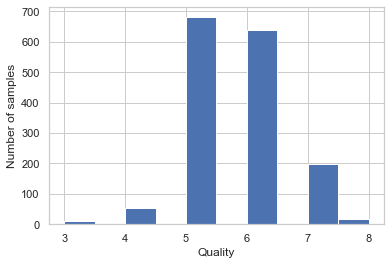

In [165]:
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

# display the histogram of the target variable 'quality'
plt.figure()
wine_data['quality'].hist()
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.show()

In [171]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

We can easily notice that wines of quality $5$ and $6$ are occuring much more frequently than others.

In [172]:
wine_data.shape

(1599, 12)

## Undersampling

Undersampling refers to sampling from the majority class in order to keep only a part of these data points.

It may be carried out using `RandomUnderSampler` class from the `imblearn` library.

In [180]:
from imblearn.under_sampling import RandomUnderSampler

In [177]:
# class count
class_count_3, class_count_4, class_count_5, class_count_6, class_count_7, class_count_8 = wine_data['quality'].value_counts()

# separate class
class_3 = wine_data[wine_data['quality'] == 3]
class_4 = wine_data[wine_data['quality'] == 4]
class_5 = wine_data[wine_data['quality'] == 5]
class_6 = wine_data[wine_data['quality'] == 6]
class_7 = wine_data[wine_data['quality'] == 7]
class_8 = wine_data[wine_data['quality'] == 8]

# print the shape of the class
print('class 3:', class_3.shape)
print('class 4:', class_4.shape)
print('class 5:', class_5.shape)
print('class 6:', class_6.shape)
print('class 7:', class_7.shape)
print('class 8:', class_8.shape)

class 3: (10, 12)
class 4: (53, 12)
class 5: (681, 12)
class 6: (638, 12)
class 7: (199, 12)
class 8: (18, 12)


In [178]:
from collections import Counter
# It allows you to count the items in an iterable list.

X = wine_data.drop(['quality'], axis=1)
y = wine_data['quality']

undersample = RandomUnderSampler(random_state=0)
X_rus, y_rus = undersample.fit_resample(X,y)

print('Original dataset shape: ', Counter(y))
print('Resampled dataset shape', Counter(y_rus))

Original dataset shape:  Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resampled dataset shape Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


The class with the least no. of samples is '3'. Hence all the other class samples are reduced to the number of samples in the least class.

## Oversampling

Oversampling refers to replicating some points from the minority class to increase the cardinality of the minority class. This might consist of either replicating or generating synthetic data for minority class.

It may be carried out using `RandomOverSampler` class from `imblearn` library.

In [179]:
from imblearn.over_sampling import RandomOverSampler

In [181]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)

print('Original dataset shape: ', Counter(y))
print('Resampled dataset shape', Counter(y_ros))

Original dataset shape:  Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resampled dataset shape Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [182]:
print(X_ros.shape[0] - X.shape[0], 'New random points generated with RandomOverSampler')

2487 New random points generated with RandomOverSampler


The class with majority number of samples is '5'. Hence all other class samples that are lesser than this class count are newly sampled to the number of samples in the majority class.

### Oversampling using `SMOTE`

`SMOTE` (Synthetic Minority Oversampling Technique) is a popular for oversampling. It is available under `imblearn` library.

In [184]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_sm,y_sm = oversample.fit_resample(X,y)
counter = Counter(y_sm)
counter

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

In [185]:
print(X_sm.shape[0] - X.shape[0], 'New random points generated with SMOTE')

2487 New random points generated with SMOTE


**Types of SMOTE:**
- Borderline SMOTE
- Borderline-SMOTE SVM
- Adaptive Synthetic Sampling (ADASYN)